## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("LoanStatus.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [3]:
statistics = df.describe().apply(lambda x: x.apply('{0:.2f}'.format))
print("Descriptive Statistics:")
statistics

Descriptive Statistics:


,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,592.00,600.00,564.00
mean,5403.46,146.41,342.00,0.84
std,6109.04,85.59,65.12,0.36
min,150.00,9.00,12.00,0.00
25%,2877.50,100.00,360.00,1.00
50%,3812.50,128.00,360.00,1.00
75%,5795.00,168.00,360.00,1.00
max,81000.00,700.00,480.00,1.00


In [4]:
blank_counts = df.isnull().sum()
print("\nNumber of Blank Values in Each Column:")
blank_counts


Number of Blank Values in Each Column:


Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [5]:
total_loans = len(df)

approved_loans = df[df['Loan_Status'] == 'Y'].shape[0]

probability_loan_approval = approved_loans / total_loans

print("Probability of getting a loan:", probability_loan_approval)

Probability of getting a loan: 0.6872964169381107


In [6]:
good_credit_history = df[df['Credit_History'] == 1]

total_good_credit_history = len(good_credit_history)

approved_loans_good_credit = good_credit_history[good_credit_history['Loan_Status'] == 'Y'].shape[0]

probability_loan_approval_good_credit = approved_loans_good_credit / total_good_credit_history
print("Probability of getting a loan with good credit history:", probability_loan_approval_good_credit)


Probability of getting a loan with good credit history: 0.7957894736842105


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

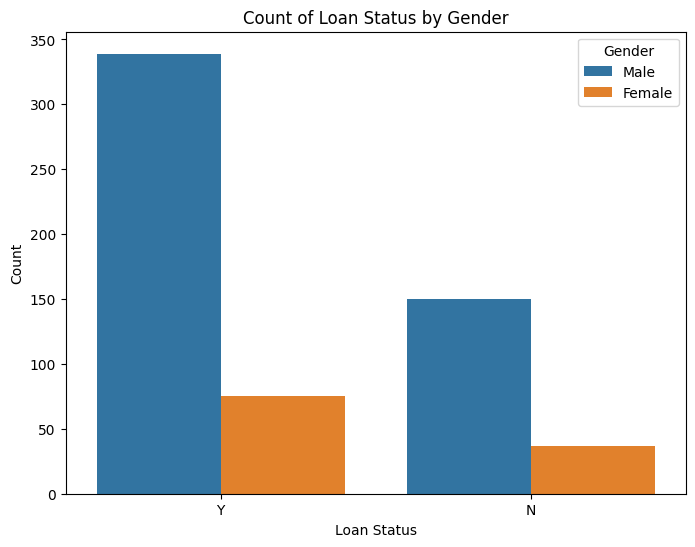

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#გამოსახულია რამდენ ქალს ან კაცს აქვს ან არ აქვს სესხი. ანუ როგორ არის გენდერზე დამოკიდებული სესხის ქონა.
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', hue='Gender', data=df)
plt.title('Count of Loan Status by Gender')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


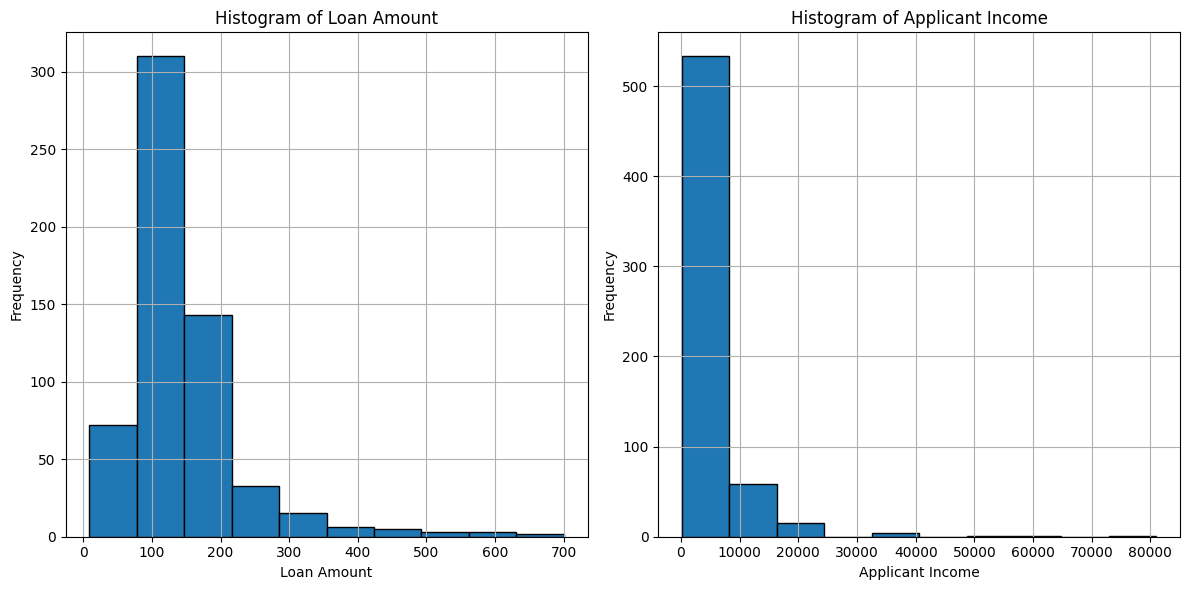

In [9]:
import matplotlib.pyplot as plt

loan_amount_data = df['LoanAmount']
income_data = df['ApplicantIncome']
num_bins = 10

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(loan_amount_data, bins=num_bins, edgecolor='black')
axs[0].set_title('Histogram of Loan Amount')
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

axs[1].hist(income_data, bins=num_bins, edgecolor='black')
axs[1].set_title('Histogram of Applicant Income')
axs[1].set_xlabel('Applicant Income')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.tight_layout()

plt.show()


## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [10]:
from scipy.stats import norm

In [11]:
mean_income = df['ApplicantIncome'].mean()
std_dev_income = df['ApplicantIncome'].std()

limit_value = 2000
cumulative_prob = norm.cdf(limit_value, mean_income, std_dev_income)

percentage_below_2000 = cumulative_prob * 100

print("Percentage of customers with income less than 2,000 euros per month:", percentage_below_2000)


Percentage of customers with income less than 2,000 euros per month: 28.872328177095586


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

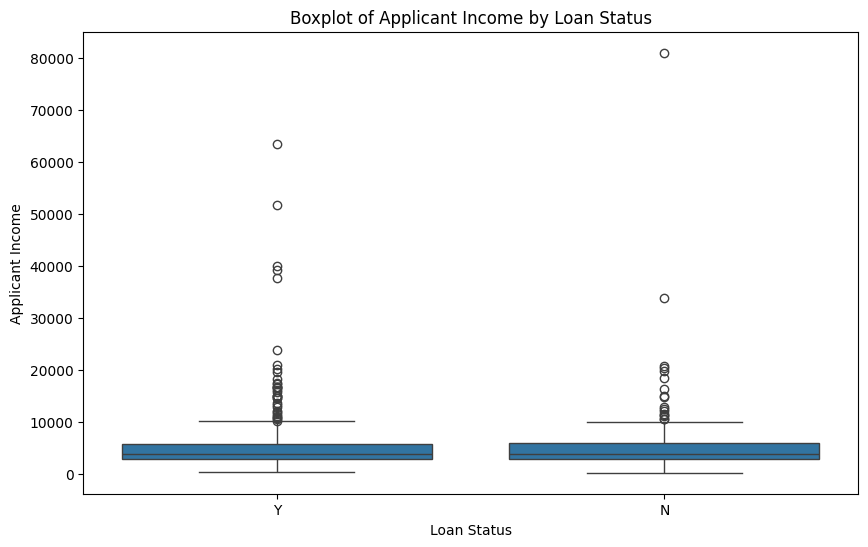

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Boxplot of Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()


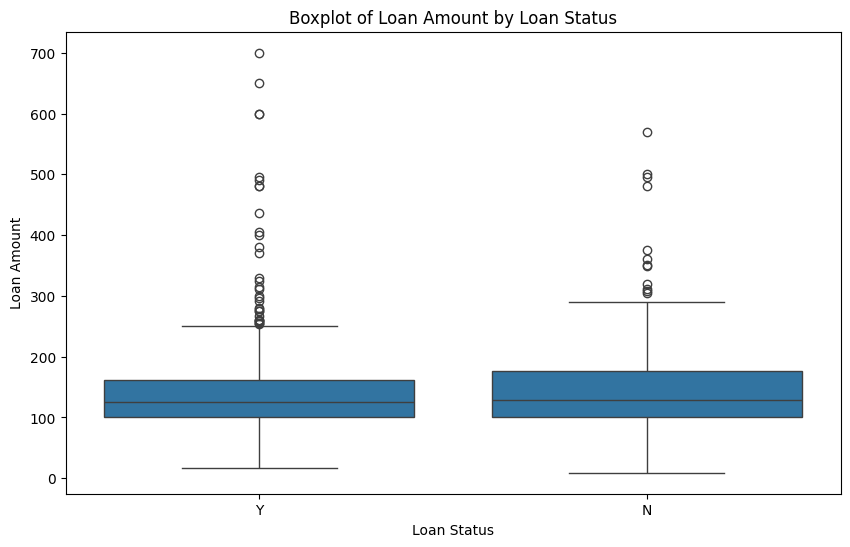

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Boxplot of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [14]:
from scipy.stats import ttest_1samp,ttest_ind

In [15]:
from scipy.stats import ttest_1samp

selected_column = df['ApplicantIncome']
specified_mean = 6000

t_statistic, p_value = ttest_1samp(selected_column, specified_mean)

alpha = 0.05
if p_value < alpha:
    print("The mean of the ApplicantIncome column is significantly different from", specified_mean)
else:
    print("The mean of the ApplicantIncome column is not significantly different from", specified_mean)


The mean of the ApplicantIncome column is significantly different from 6000


In [16]:
from scipy.stats import ttest_ind

column1 = df['ApplicantIncome']
column2 = df['LoanAmount']

t_statistic, p_value = ttest_ind(column1, column2)

alpha = 0.05
if p_value < alpha:
    print("The means of the ApplicantIncome and LoanAmount columns are significantly different.")
else:
    print("The means of the ApplicantIncome and LoanAmount columns are not significantly different.")


The means of the ApplicantIncome and LoanAmount columns are not significantly different.
